In [17]:
from tkinter import *
from tkinter import filedialog
import os
import tkinter as tk
import cv2
from PIL import Image, ImageTk
import numpy as np
from matplotlib import pyplot as plt
import math

In [35]:
root = Tk()
root.geometry('800x800')

''

In [36]:
def showimage():
    fln = filedialog.askopenfilename(initialdir=os.getcwd(), title="Select Image file", filetypes=[("ALL FILES", "*.*")])
    print(fln)
    global im
    if fln:
        image = cv2.imread(fln)
        image = cv2.resize(image , (450,350))
        im = image.copy()
        
    cropping = False
    x_start, y_start, x_end, y_end = 0, 0, 0, 0
    global mu_b_low
    low_pixel_intensity = 0.0
    mu_b_low = 0.0

# image = cv2.imread('C:/Users/vbj/ffyp/Final-Year-Project/X-Rays/70_40.bmp')
    oriImage = image.copy()


    def mouse_crop(event, x, y, flags, param):
    # grab references to the global variables
        global x_start, y_start, x_end, y_end, cropping, low_pixel_intensity

            # if the left mouse button was DOWN, start RECORDING
            # (x, y) coordinates and indicate that cropping is being
        if event == cv2.EVENT_LBUTTONDOWN:
            x_start, y_start, x_end, y_end = x, y, x, y
            cropping = True

            # Mouse is Moving
        elif event == cv2.EVENT_MOUSEMOVE:
            if cropping == True:
                x_end, y_end = x, y

            # if the left mouse button was released
        elif event == cv2.EVENT_LBUTTONUP:
                # record the ending (x, y) coordinates
            x_end, y_end = x, y
            cropping = False # cropping is finished

            refPoint = [(x_start, y_start), (x_end, y_end)]
            print(refPoint)
            if len(refPoint) == 2: #when two points were found
                roi = oriImage[refPoint[0][1]:refPoint[1][1], refPoint[0][0]:refPoint[1][0]]
                cv2.imshow("Cropped", roi) 
                cv2.imwrite("C:/Users/vbj/f1/Final-Year-Project/X-Rays/r.png", roi)
#                 crop_img = cv2.imread('X-Rays/r.png')
                
#                 norm_img = np.zeros((800,800))
#                 final_image = cv2.normalize(crop_img,  norm_img, 0, 255, cv2.NORM_MINMAX)
#                 low_image = Image.fromarray(final_image)
#                 pixel_intensity = np.mean(low_image)
#                 low_pixel_intensity = pixel_intensity
#                 plt.imshow(low_image)
#                 print(pixel_intensity)

                norm_img = np.zeros((800,800))
                final_image = cv2.normalize(im,  norm_img, 0, 255, cv2.NORM_MINMAX)
                low_image = Image.fromarray(final_image)
                low_cropped_img = low_image.crop((x_start,y_start,x_end,y_end))
                pixel_intensity = np.mean(low_cropped_img)
#     plt.imshow(low_cropped_img)
#     print(low_avg_pixel_intensity)
                low_pixel_intensity = pixel_intensity
                print(low_pixel_intensity)
                img = Image.fromarray(roi)
                img = PhotoImage(file="C:/Users/vbj/f1/Final-Year-Project/X-Rays/r.png")
                
        
                lbl1 = Label(root,image = img).place(x = 100, y = 50)
                lbl1.pack()

    cv2.namedWindow("image")
    cv2.setMouseCallback("image", mouse_crop)
    i = image.copy()

    if not cropping:
        cv2.imshow("image", image)
        
        
    

    elif cropping:
        cv2.rectangle(i, (x_start, y_start), (x_end, y_end), (255, 0, 0), 2)
        cv2.imshow("image", i)
        
    
    if "70" in fln:
        mu_b_low = 0.255
    elif "84" in fln and "60" in fln:
        mu_b_low = 0.214
            
    print(mu_b_low)

   
            

In [37]:
def highimage():
    fln = filedialog.askopenfilename(initialdir=os.getcwd(), title="Select Image file", filetypes=[("ALL FILES", "*.*")])
    print(fln)
    global im_high
    if fln:
        image = cv2.imread(fln)
        image = cv2.resize(image , (450,350))
        im_high = image.copy()
        
    highcropping = False
    left, top, right, bottom = 0, 0, 0, 0
    global mu_b_high
#     low_pixel_intensity = 0.0
    mu_b_high = 0.0

# image = cv2.imread('C:/Users/vbj/ffyp/Final-Year-Project/X-Rays/70_40.bmp')
    oriImage = image.copy()


    def mouse_crop(event, x, y, flags, param):
    # grab references to the global variables
        global left, right, top, bottom, highcropping, high_pixel_intensity

            # if the left mouse button was DOWN, start RECORDING
            # (x, y) coordinates and indicate that cropping is being
        if event == cv2.EVENT_LBUTTONDOWN:
            left, top, right, bottom = x, y, x, y
            highcropping = True

            # Mouse is Moving
        elif event == cv2.EVENT_MOUSEMOVE:
            if highcropping == True:
                right, bottom = x, y

            # if the left mouse button was released
        elif event == cv2.EVENT_LBUTTONUP:
                # record the ending (x, y) coordinates
            right, bottom = x, y
            highcropping = False # cropping is finished

            refPoint = [(left, top), (right, bottom)]
            print(refPoint)
            if len(refPoint) == 2: #when two points were found
                roi = oriImage[refPoint[0][1]:refPoint[1][1], refPoint[0][0]:refPoint[1][0]]
                cv2.imshow("Cropped", roi) 
                cv2.imwrite("C:/Users/vbj/f1/Final-Year-Project/X-Rays/rhigh.png", roi)
#                 crop_img = cv2.imread('X-Rays/r.png')
                
#                 norm_img = np.zeros((800,800))
#                 final_image = cv2.normalize(crop_img,  norm_img, 0, 255, cv2.NORM_MINMAX)
#                 low_image = Image.fromarray(final_image)
#                 pixel_intensity = np.mean(low_image)
#                 low_pixel_intensity = pixel_intensity
#                 plt.imshow(low_image)
#                 print(pixel_intensity)

                norm_img = np.zeros((800,800))
                final_image = cv2.normalize(im_high,  norm_img, 0, 255, cv2.NORM_MINMAX)
                low_image = Image.fromarray(final_image)
                low_cropped_img = low_image.crop((left,top,right,bottom))
                pixel_intensity = np.mean(low_cropped_img)
#     plt.imshow(low_cropped_img)
#     print(low_avg_pixel_intensity)
                high_pixel_intensity = pixel_intensity
                print(low_pixel_intensity)
                img = Image.fromarray(roi)
                img = PhotoImage(file="C:/Users/vbj/f1/Final-Year-Project/X-Rays/rhigh.png")
                
        
                lbl2 = Label(root,image = img).place(x = 100, y = 50)
                lbl2.pack()

    cv2.namedWindow("image")
    cv2.setMouseCallback("image", mouse_crop)
    i = image.copy()

    if not highcropping:
        cv2.imshow("image", image)
        
        
    

    elif highcropping:
        cv2.rectangle(i, (left, top), (right, bottom), (255, 0, 0), 2)
        cv2.imshow("image", i)
        
    if "111" in fln and "120" in fln:
        mu_b_high = 0.172
    elif "98" in fln and "100" in fln:
        mu_b_high = 0.189
    elif "92" in fln:
        mu_b_high = 0.199
    print(mu_b_high)

   
            

In [38]:
def lsoftimage():
    fln = filedialog.askopenfilename(initialdir=os.getcwd(), title="Select Image file", filetypes=[("ALL FILES", "*.*")])
    print(fln)
    global im_soft
    if fln:
        image = cv2.imread(fln)
        image = cv2.resize(image , (450,350))
        im_soft = image.copy()
        
    softcropping = False
    lefts, tops, rights, bottoms = 0, 0, 0, 0
#     global mu_b_low
#     low_pixel_intensity = 0.0
#     mu_b_high = 0.0

# image = cv2.imread('C:/Users/vbj/ffyp/Final-Year-Project/X-Rays/70_40.bmp')
    oriImage = image.copy()


    def mouse_crop(event, x, y, flags, param):
    # grab references to the global variables
        global lefts, rights, tops, bottoms, softcropping, k_low_pixel_intensity

            # if the left mouse button was DOWN, start RECORDING
            # (x, y) coordinates and indicate that cropping is being
        if event == cv2.EVENT_LBUTTONDOWN:
            lefts, tops, rights, bottoms = x, y, x, y
            softcropping = True

            # Mouse is Moving
        elif event == cv2.EVENT_MOUSEMOVE:
            if softcropping == True:
                rights, bottoms = x, y

            # if the left mouse button was released
        elif event == cv2.EVENT_LBUTTONUP:
                # record the ending (x, y) coordinates
            rights, bottoms = x, y
            softcropping = False # cropping is finished

            refPoint = [(lefts, tops), (rights, bottoms)]
            print(refPoint)
            if len(refPoint) == 2: #when two points were found
                roi = oriImage[refPoint[0][1]:refPoint[1][1], refPoint[0][0]:refPoint[1][0]]
                cv2.imshow("Cropped", roi) 
                cv2.imwrite("C:/Users/vbj/f1/Final-Year-Project/X-Rays/softl.png", roi)
#                 crop_img = cv2.imread('X-Rays/r.png')
                
#                 norm_img = np.zeros((800,800))
#                 final_image = cv2.normalize(crop_img,  norm_img, 0, 255, cv2.NORM_MINMAX)
#                 low_image = Image.fromarray(final_image)
#                 pixel_intensity = np.mean(low_image)
#                 low_pixel_intensity = pixel_intensity
#                 plt.imshow(low_image)
#                 print(pixel_intensity)

                norm_img = np.zeros((800,800))
                final_image = cv2.normalize(im_soft,  norm_img, 0, 255, cv2.NORM_MINMAX)
                low_image = Image.fromarray(final_image)
                low_cropped_img = low_image.crop((lefts,tops,rights,bottoms))
                pixel_intensity = np.mean(low_cropped_img)
#     plt.imshow(low_cropped_img)
#     print(low_avg_pixel_intensity)
                k_low_pixel_intensity = pixel_intensity
                print(k_low_pixel_intensity)
                img = Image.fromarray(roi)
                img = PhotoImage(file="C:/Users/vbj/f1/Final-Year-Project/X-Rays/softl.png")
                
        
                lbl2 = Label(root,image = img).place(x = 100, y = 50)
                lbl2.pack()

    cv2.namedWindow("image")
    cv2.setMouseCallback("image", mouse_crop)
    i = image.copy()

    if not softcropping:
        cv2.imshow("image", image)
        
        
    

    elif softcropping:
        cv2.rectangle(i, (lefts, tops), (rights, bottoms), (255, 0, 0), 2)
        cv2.imshow("image", i)
        
#     if "111" in fln and "120" in fln:
#         mu_b_high = 0.172
#     elif "98" in fln and "100" in fln:
#         mu_b_high = 0.189
#     elif "92" in fln and "80" in fln:
#         mu_b_high = 0.199
#     print(mu_b_high)

   
            

In [39]:
def hsoftimage():
    fln = filedialog.askopenfilename(initialdir=os.getcwd(), title="Select Image file", filetypes=[("ALL FILES", "*.*")])
    print(fln)
    global im_soft_high
    if fln:
        image = cv2.imread(fln)
        image = cv2.resize(image , (450,350))
        im_soft_high = image.copy()
        
    softhcropping = False
    lefth, toph, righth, bottomh = 0, 0, 0, 0
#     global mu_b_low
#     low_pixel_intensity = 0.0
#     mu_b_high = 0.0

# image = cv2.imread('C:/Users/vbj/ffyp/Final-Year-Project/X-Rays/70_40.bmp')
    oriImage = image.copy()


    def mouse_crop(event, x, y, flags, param):
    # grab references to the global variables
        global lefth, righth, toph, bottomh, softhcropping, k_high_pixel_intensity

            # if the left mouse button was DOWN, start RECORDING
            # (x, y) coordinates and indicate that cropping is being
        if event == cv2.EVENT_LBUTTONDOWN:
            lefth, toph, righth, bottomh = x, y, x, y
            softhcropping = True

            # Mouse is Moving
        elif event == cv2.EVENT_MOUSEMOVE:
            if softhcropping == True:
                righth, bottomh = x, y

            # if the left mouse button was released
        elif event == cv2.EVENT_LBUTTONUP:
                # record the ending (x, y) coordinates
            righth, bottomh = x, y
            softhcropping = False # cropping is finished

            refPoint = [(lefth, toph), (righth, bottomh)]
            print(refPoint)
            if len(refPoint) == 2: #when two points were found
                roi = oriImage[refPoint[0][1]:refPoint[1][1], refPoint[0][0]:refPoint[1][0]]
                cv2.imshow("Cropped", roi) 
                cv2.imwrite("C:/Users/vbj/f1/Final-Year-Project/X-Rays/softh.png", roi)
#                 crop_img = cv2.imread('X-Rays/r.png')
                
#                 norm_img = np.zeros((800,800))
#                 final_image = cv2.normalize(crop_img,  norm_img, 0, 255, cv2.NORM_MINMAX)
#                 low_image = Image.fromarray(final_image)
#                 pixel_intensity = np.mean(low_image)
#                 low_pixel_intensity = pixel_intensity
#                 plt.imshow(low_image)
#                 print(pixel_intensity)

                norm_img = np.zeros((800,800))
                final_image = cv2.normalize(im_soft_high,  norm_img, 0, 255, cv2.NORM_MINMAX)
                low_image = Image.fromarray(final_image)
                low_cropped_img = low_image.crop((lefth,toph,righth,bottomh))
                pixel_intensity = np.mean(low_cropped_img)
#     plt.imshow(low_cropped_img)
#     print(low_avg_pixel_intensity)
                k_high_pixel_intensity = pixel_intensity
                print(k_high_pixel_intensity)
                img = Image.fromarray(roi)
                img = PhotoImage(file="C:/Users/vbj/f1/Final-Year-Project/X-Rays/softh.png")
                
        
                lbl2 = Label(root,image = img).place(x = 100, y = 50)
                lbl2.pack()

    cv2.namedWindow("image")
    cv2.setMouseCallback("image", mouse_crop)
    i = image.copy()

    if not softhcropping:
        cv2.imshow("image", image)
        
        
    

    elif softhcropping:
        cv2.rectangle(i, (lefth, toph), (righth, bottomh), (255, 0, 0), 2)
        cv2.imshow("image", i)
        
#     if "111" in fln and "120" in fln:
#         mu_b_high = 0.172
#     elif "98" in fln and "100" in fln:
#         mu_b_high = 0.189
#     elif "92" in fln and "80" in fln:
#         mu_b_high = 0.199
#     print(mu_b_high)

   
            

In [40]:
def bmd():
    K = math.log(k_low_pixel_intensity)/math.log(k_high_pixel_intensity)
    Numerator = (math.log(low_pixel_intensity)) - (K * math.log(high_pixel_intensity)) 
    Denominator = mu_b_low - (K * mu_b_high)
    M_b = Numerator/Denominator
    
    lbl = Label(root,text=str(M_b)).place(x = 150, y = 50)
    lbl.pack()

In [41]:
frame = Frame(root)
frame.pack(side=BOTTOM, padx=15, pady = 15)

lbl = Label(root)
lbl.pack()

btn = Button(frame,text="Low-Image", command=showimage)
btn.pack(side=tk.LEFT)

btn2 = Button(frame,text="High-Image", command=highimage)
btn2.pack(side=tk.LEFT,padx = 10)

btn3 = Button(frame,text="Low-Soft-tissue", command=lsoftimage)
btn3.pack(side=tk.LEFT)

btn4 = Button(frame,text="High-Soft-tissue", command=hsoftimage)
btn4.pack(side=tk.LEFT,padx = 10)


btn5 = Button(frame,text="BMD", command=bmd)
btn5.pack(side=tk.LEFT,padx = 10)


root.title("BMD")
root.geometry("300x350")
root.mainloop()

C:/Users/vbj/f1/Final-Year-Project/X-Rays/70KV.jpg
0.255
[(212, 78), (251, 94)]
154.22916666666666


AttributeError: 'NoneType' object has no attribute 'pack'

C:/Users/vbj/f1/Final-Year-Project/X-Rays/92KV.jpg
0.199
[(213, 109), (251, 125)]
154.22916666666666


AttributeError: 'NoneType' object has no attribute 'pack'

C:/Users/vbj/f1/Final-Year-Project/X-Rays/70KV.jpg
[(297, 121), (346, 148)]
58.38095238095238


AttributeError: 'NoneType' object has no attribute 'pack'

C:/Users/vbj/f1/Final-Year-Project/X-Rays/92KV.jpg
[(294, 146), (341, 170)]
74.18882978723404


AttributeError: 'NoneType' object has no attribute 'pack'

Exception in Tkinter callback
Traceback (most recent call last):
  File "C:\Users\vbj\Anaconda3\lib\tkinter\__init__.py", line 1705, in __call__
    return self.func(*args)
  File "<ipython-input-40-2744c0e9807e>", line 8, in bmd
    lbl.pack()
AttributeError: 'NoneType' object has no attribute 'pack'


In [7]:
print(high_pixel_intensity)

78.69444444444444


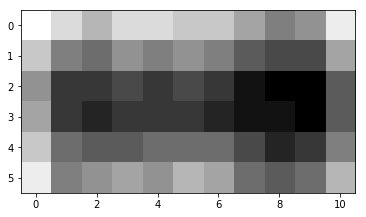

In [81]:
img = cv2.imread('X-Rays/r.png')
norm_img = np.zeros((800,800))
final_image = cv2.normalize(img,  norm_img, 0, 255, cv2.NORM_MINMAX)
low_image = Image.fromarray(final_image)
plt.imshow(low_image)

In [42]:
print(low_pixel_intensity)
print(high_pixel_intensity)
print(k_high_pixel_intensity)
print(k_low_pixel_intensity)

154.22916666666666
115.19243421052632
74.18882978723404
58.38095238095238


In [27]:
print(x_start,y_start,x_end,y_end)
print(left,top,right,bottom)

208 51 245 64
210 50 244 62


In [58]:
bmd()

-3.038320913762347
